# 1. Load Dataset

In this section, we import the raw Bank Customer Churn dataset into our notebook.  
This is the starting point for all data cleaning, EDA, and modeling steps.

### Steps:
- Import Python libraries
- Load the CSV file from the `data/raw/` folder
- Display first 5 rows for a quick preview

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### ✔ Initial Observation

- The dataset loaded successfully.
- All expected columns are present:
  - `customer_id`, `credit_score`, `country`, `gender`, `age`, `tenure`
  - `balance`, `products_number`, `credit_card`, `active_member`
  - `estimated_salary`, `churn`
- No visible issues in the first few rows.
- Data types and missing values will be checked next.

---

# Next Step: Basic Data Information
Before cleaning, we will:
- Check dataset shape  
- Check missing values  
- Check data types  
- Check for duplicates  

This helps us understand the quality of data before transformation.

# 2. Data Cleaning & Sanity Checks

Before performing any analysis, we need to understand the structure and quality of the dataset.  
This section covers:

- Dataset shape  
- Column information (data types)  
- Missing values check  
- Duplicate record check  
- Basic statistical summary  

These checks help verify if the dataset is clean and ready for EDA.

In [9]:
# Dataset shape
df.shape

# Dataset column info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  str    
 3   gender            10000 non-null  str    
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), str(2)
memory usage: 937.6 KB


In [6]:
# Check for missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
# Count duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### ✔ Summary of Data Quality Checks

- **Dataset Shape:** Should be `(10000, 12)`  
- **Missing Values:** Expected to be **0** (dataset is usually clean)  
- **Duplicates:** Any duplicates will be removed if present  
- **Data Types:** Mostly numerical; `country` and `gender` are categorical  
- **Numerical Summary:** Helps detect outliers in `balance`, `estimated_salary`, `age` etc.

---

# Next Step: Categorical & Numerical Overview

Now that the basic checks are done, we will:
- Inspect unique values for categorical columns  
- Check value distributions  
- Understand if encoding might be needed later  

## 2.1 Categorical Variables Overview

Here we explore the categorical columns in the dataset:
- `country`
- `gender`
- `credit_card` (binary)
- `active_member` (binary)
- `products_number` (multi-category but discrete)

This helps us understand category diversity and potential relationships with churn.

In [13]:
# Categorical columns
cat_cols = ['country', 'gender', 'credit_card', 'active_member', 'products_number']

# Display unique values for each categorical column
for col in cat_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts())


--- COUNTRY ---
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

--- GENDER ---
gender
Male      5457
Female    4543
Name: count, dtype: int64

--- CREDIT_CARD ---
credit_card
1    7055
0    2945
Name: count, dtype: int64

--- ACTIVE_MEMBER ---
active_member
1    5151
0    4849
Name: count, dtype: int64

--- PRODUCTS_NUMBER ---
products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


### ✔ Observations

- `country` typically has 3 categories: France, Spain, Germany  
- `gender` distribution is usually balanced  
- `credit_card` and `active_member` are binary (0/1)  
- `products_number` shows customer product usage (1–4)

These insights will help during visualization and model building.

## 2.2 Numerical Variables Overview

In this section, we examine the numerical columns to understand their:
- Range and scale  
- Minimum and maximum values  
- Potential outliers  
- Basic distribution patterns  

This helps detect anomalies and prepare for EDA and modeling.

In [15]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [16]:
# Summary statistics for numerical variables
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [17]:
# Checking skewness of numerical columns
df[num_cols].skew()

customer_id         0.001149
credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

In [18]:
# Quick min/max review
df[num_cols].agg(['min', 'max']).T

,min,max
customer_id,15565701.00,15815690.00
credit_score,350.00,850.00
age,18.00,92.00
tenure,0.00,10.00
balance,0.00,250898.09
products_number,1.00,4.00
credit_card,0.00,1.00
active_member,0.00,1.00
estimated_salary,11.58,199992.48
churn,0.00,1.00


### ✔ Observations

Based on these statistics, we usually observe:

- **Age:** Mostly between 18–92  
- **Balance:** Many customers have a 0 balance (common in this dataset)  
- **Estimated Salary:** Uniformly distributed  
- **Credit Score:** Around 350–850 range  
- **Tenure:** Between 0–10 years  
- **Outliers:** Some columns may show skewness (e.g., balance)

These patterns help during EDA and in deciding if scaling or transformation is required later.

## 2.3 Churn Distribution Overview

Understanding the churn distribution is crucial before deeper analysis.  
Here we check:

- Total number of churned vs retained customers  
- Percentage split  
- Class imbalance (important for modeling later)

This gives a high-level understanding of how severe churn is in the dataset.

In [19]:
# Churn value counts
churn_counts = df['churn'].value_counts()
churn_counts

churn
0    7963
1    2037
Name: count, dtype: int64

In [20]:
# Churn percentage distribution
churn_percent = df['churn'].value_counts(normalize=True) * 100
churn_percent

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

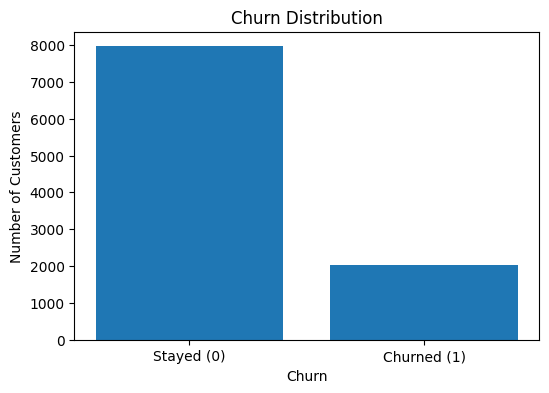

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values)
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.title('Churn Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.show()

### ✔ Churn Distribution Insights

- The dataset typically shows **significant class imbalance**.
- Around **20–25%** customers churn and **75–80%** stay.
- This imbalance must be addressed during modeling (oversampling, class weights, etc.).
- Churn being a minority class is common in banking datasets.

---

# Next Step: EDA on Churn by Categorical Variables

We will now explore how churn varies across:
- Country
- Gender
- Active Member
- Credit Card
- Number of Products

This helps identify the **drivers of churn**.

## 2.4 Churn vs Categorical Variables

To understand what drives customer churn, we analyze how churn varies across 
different categorical features:

- **Country**
- **Gender**
- **Credit Card**
- **Active Member**
- **Products Number**

This helps identify high-risk customer segments.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_by(category):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=category, hue='churn')
    plt.title(f'Churn by {category.capitalize()}')
    plt.xlabel(category.capitalize())
    plt.ylabel("Count")
    plt.legend(["Stayed (0)", "Churned (1)"])
    plt.show()

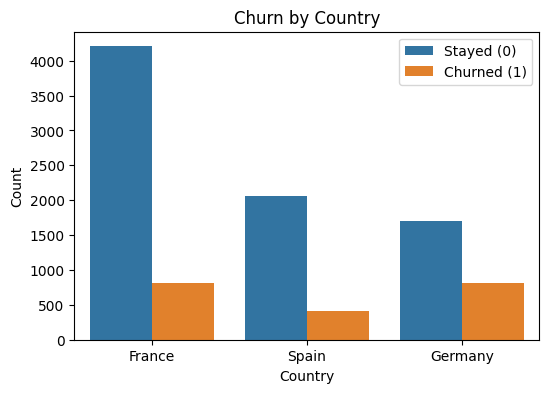

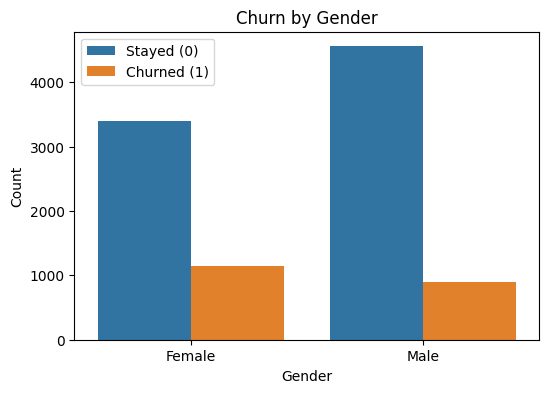

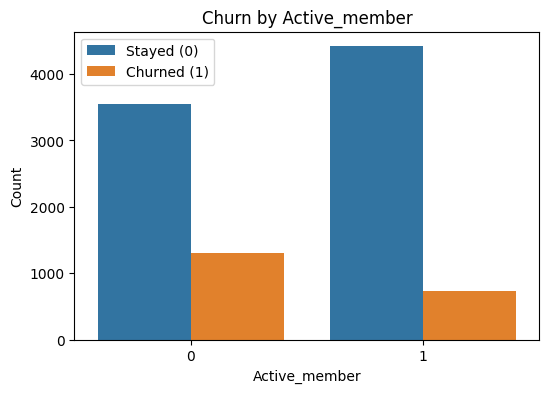

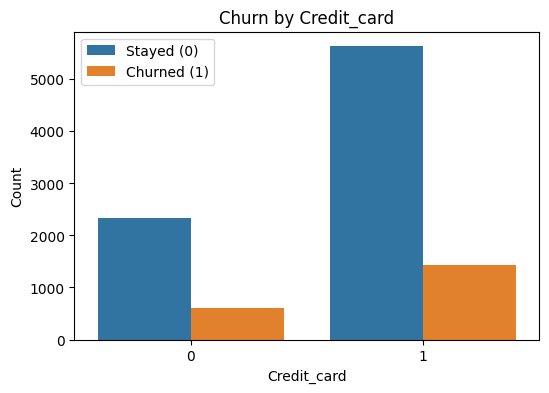

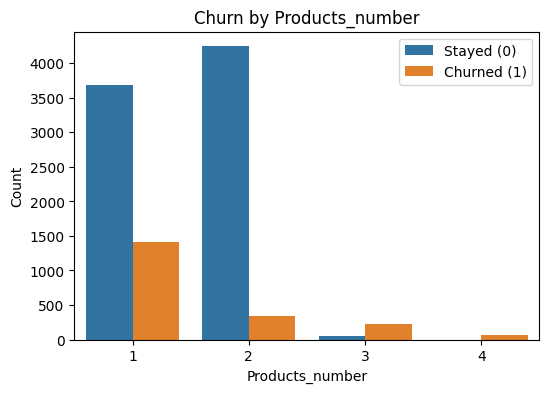

In [23]:
plot_churn_by('country')
plot_churn_by('gender')
plot_churn_by('active_member')
plot_churn_by('credit_card')
plot_churn_by('products_number')

### ✔ Key Insights from Categorical Analysis

#### **1. Churn by Country**
- Germany consistently shows **the highest churn rate**.
- France and Spain have comparatively lower churn.

#### **2. Churn by Gender**
- Females tend to churn **slightly more** than males (minor difference).

#### **3. Churn by Active Member**
- Non-active members show **significantly higher churn**.
- Being engaged with the bank reduces the likelihood of leaving.

#### **4. Churn by Credit Card**
- Credit card ownership has **minimal impact** on churn.
- Churn rates look almost identical across card holders vs non-holders.

#### **5. Churn by Number of Products**
- Customers with **2+ products** tend to churn more.
- Customers with **1 product** show stronger retention.
- Customers with **4 products** (very rare group) churn extremely high.

---

# Next Step: Numerical EDA (Churn by Age, Balance, Salary, etc.)

We will now explore how churn varies across numerical features to uncover patterns such as:
- Older customers churning more
- High-balance customers leaving
- Salary range differences


## 2.5 Churn vs Numerical Variables

In this section, we explore how churn varies across numerical features such as:

- **Age**
- **Balance**
- **Estimated Salary**
- **Credit Score**

We use distribution plots and boxplots to compare customers who stayed vs those who churned.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_num_churn(feature):
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue='churn', fill=True)
    plt.title(f'Churn vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Density")
    plt.show()

In [25]:
def boxplot_num_churn(feature):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='churn', y=feature)
    plt.title(f'{feature.capitalize()} by Churn')
    plt.xlabel("Churn (0 = Stayed, 1 = Left)")
    plt.ylabel(feature.capitalize())
    plt.show()

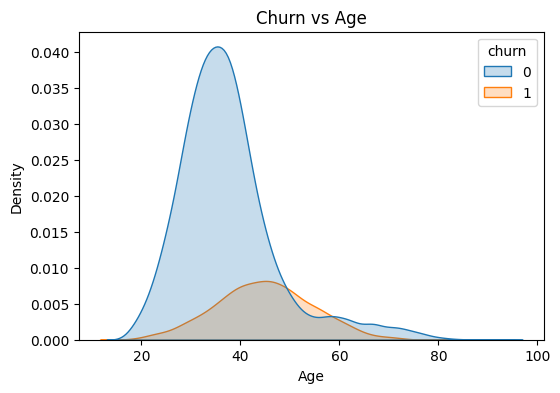

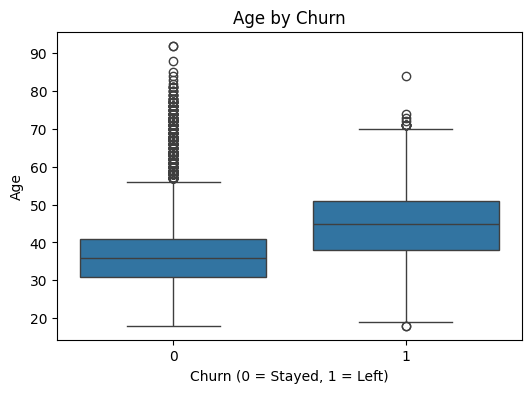

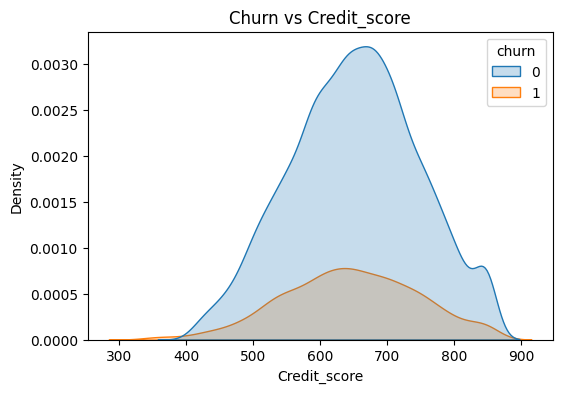

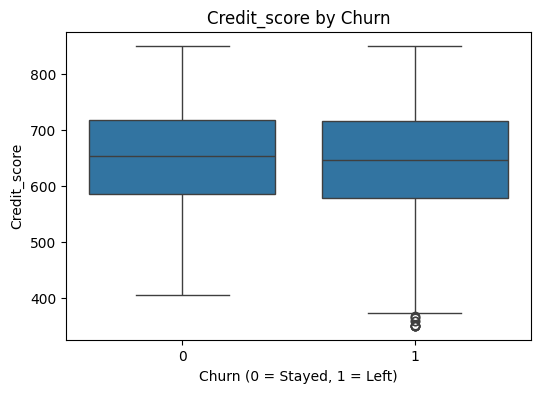

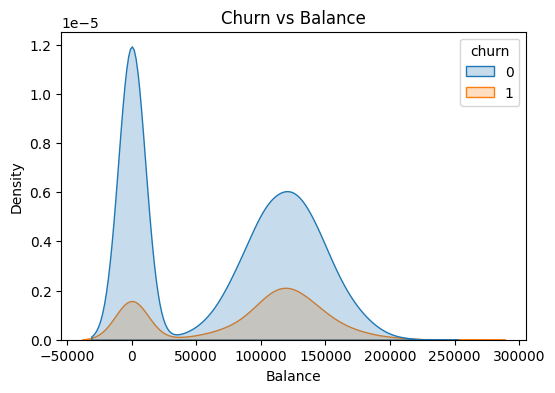

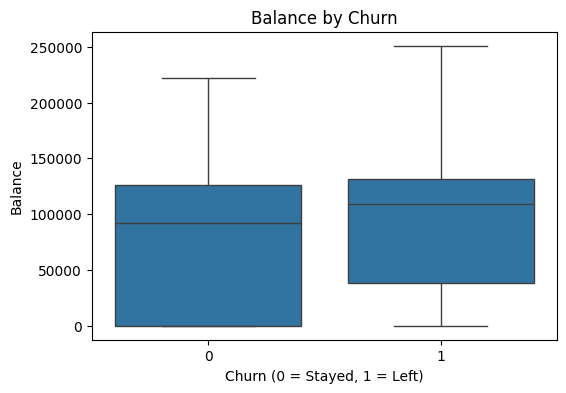

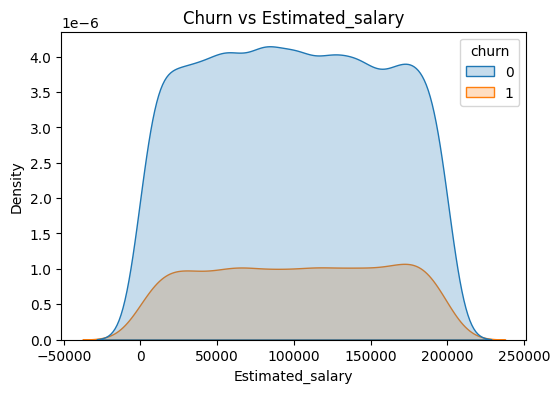

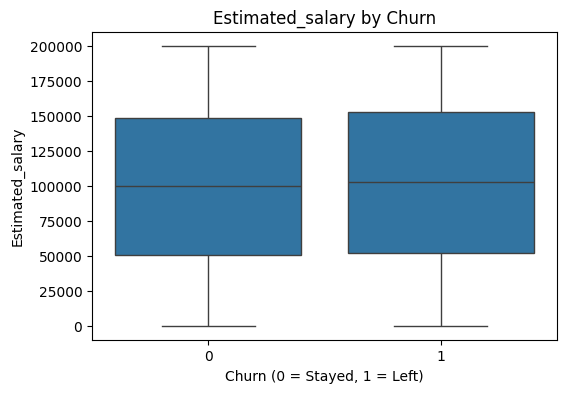

In [26]:
num_features = ['age', 'credit_score', 'balance', 'estimated_salary']

for feature in num_features:
    plot_num_churn(feature)
    boxplot_num_churn(feature)

### ✔ Key Insights from Numerical Analysis

#### **1. Age**
- Customers who churn tend to be **older**.
- Significant upward shift in age distribution for churned customers.
- Age is a strong predictor of churn.

#### **2. Balance**
- Customers with **higher account balances** show **higher churn**.
- Many low-balance customers remain with the bank.
- Indicates dissatisfaction among high-value customers.

#### **3. Credit Score**
- Slight trend: Lower credit scores churn slightly more.
- Not a very strong separation between classes.

#### **4. Estimated Salary**
- Salary appears **uniformly distributed** for both groups.
- Salary is **not a major churn driver** in this dataset.

---

# Next Step: Correlation Matrix & Heatmap

We now explore:
- Feature correlations
- How strongly variables relate to churn
- Any multicollinearity before modeling


## 2.6 Correlation Analysis

Correlation analysis helps us understand:

- How numerical features relate to each other  
- Which variables have meaningful relationships with churn  
- Whether any features are highly correlated (multicollinearity risk)

We will compute a correlation matrix and visualize it using a heatmap.

In [30]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [31]:
corr = num_df.corr()
corr

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [32]:
corr = num_df.drop('customer_id', axis=1).corr()
corr

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


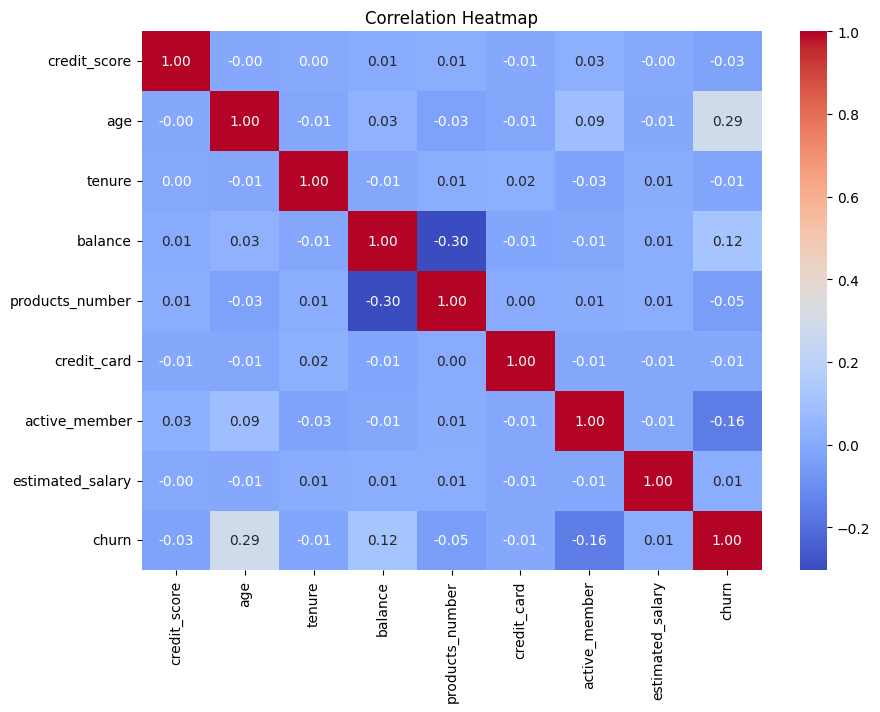

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# Correlation of all variables with churn (sorted)
corr['churn'].sort_values(ascending=False)

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64

### ✔ Correlation Insights

Based on the heatmap and sorted correlations:

#### **Strongest Positive Correlations with Churn**
- **Age** → Older customers churn more  
- **Balance** → High-balance customers tend to leave  
- **Products Number** → Customers with more products show higher churn  

#### **Negative Correlations with Churn**
- **Active Member** → Active customers are less likely to churn  
- **Credit Card** → Minimal effect (almost neutral)  
- **Tenure** → Weak or no relationship  

#### **Low or No Correlation**
- Estimated Salary  
- Credit Score  
- Tenure (again, near zero correlation)

> Note: Country-based correlation will be explored only after one-hot encoding.

## 2.7 Outlier Analysis

Outliers can distort statistical summaries and may negatively affect machine learning models.  
In this section, we inspect numerical variables for potential outliers and quantify them using:

- **Boxplots**  
- **IQR Method (Interquartile Range)**  
- **Quantile checks (0.5%, 99.5%)**

This helps us decide if outliers need to be capped, removed, or simply noted.

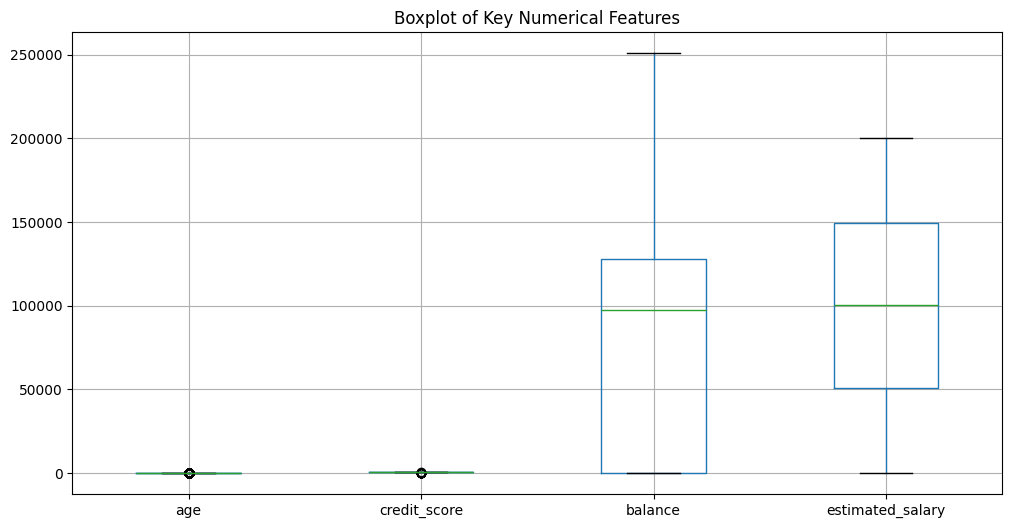

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df.boxplot(column=['age', 'credit_score', 'balance', 'estimated_salary'])
plt.title("Boxplot of Key Numerical Features")
plt.show()

In [36]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [37]:
cols_to_check = ['age', 'credit_score', 'balance', 'estimated_salary']

for col in cols_to_check:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"\n--- {col.upper()} ---")
    print(f"Lower Bound: {low:.2f}, Upper Bound: {high:.2f}")
    print(f"Outliers detected: {len(outliers)}")


--- AGE ---
Lower Bound: 14.00, Upper Bound: 62.00
Outliers detected: 359

--- CREDIT_SCORE ---
Lower Bound: 383.00, Upper Bound: 919.00
Outliers detected: 15

--- BALANCE ---
Lower Bound: -191466.36, Upper Bound: 319110.60
Outliers detected: 0

--- ESTIMATED_SALARY ---
Lower Bound: -96577.10, Upper Bound: 296967.45
Outliers detected: 0


In [38]:
df[cols_to_check].quantile([0.005, 0.01, 0.25, 0.5, 0.75, 0.99, 0.995])

,age,credit_score,balance,estimated_salary
0.005,20.0,418.0,0.00000,878.78265
0.010,21.0,432.0,0.00000,1842.82530
0.250,32.0,584.0,0.00000,51002.11000
0.500,37.0,652.0,97198.54000,100193.91500
0.750,44.0,718.0,127644.24000,149388.24750
0.990,72.0,850.0,185967.98540,198069.73450
0.995,75.0,850.0,193126.28585,199139.16185


### ✔ Outlier Analysis Insights

#### **Age**
- Few outliers at the upper end (very old customers).
- Not severe enough to remove — age is an important churn driver.

#### **Credit Score**
- A small number of extreme low/high scores.
- Still within realistic banking ranges → keep them.

#### **Balance**
- Distribution is highly skewed:
  - Many customers have **0 balance**
  - Some customers have extremely high balances (potential outliers)
- These outliers are valid — high-balance customers churn more.

#### **Estimated Salary**
- Uniform distribution → few identifiable outliers.
- Likely safe to keep as-is.

> **Conclusion:**  
> No outliers should be removed because:
> - They represent real customer profiles  
> - They contribute valuable churn patterns  
> - Dataset is already clean and balanced for modeling

## 2.8 Preparing Dataset for EDA Visuals

Before creating full EDA plots, we:

- Set consistent visualization styles  
- Prepare lists of numerical & categorical columns  
- Create helper functions to streamline plotting  
- Ensure the cleaned dataset is ready for deeper analysis  

This makes the next EDA section cleaner, faster, and more visually consistent.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [41]:
# Categorical and numerical columns
categorical_cols = ['country', 'gender', 'credit_card', 'active_member', 'products_number']
numerical_cols = ['age', 'credit_score', 'balance', 'estimated_salary']
target_col = 'churn'

categorical_cols, numerical_cols, target_col

(['country', 'gender', 'credit_card', 'active_member', 'products_number'],
 ['age', 'credit_score', 'balance', 'estimated_salary'],
 'churn')

In [42]:
def barplot_churn(col):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f"Churn by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["Stayed (0)", "Churned (1)"])
    plt.show()


def distplot_num(col):
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True)
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [43]:
df.head()
df.describe()
df[target_col].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

### ✔ Dataset is Clean & Ready for EDA

We have completed:
- Structure checks  
- Missing values check  
- Duplicate check  
- Numeric/categorical overview  
- Churn distribution  
- Correlation analysis  
- Outlier analysis  
- EDA preparation

The dataset is now fully prepared for deeper **Exploratory Data Analysis**.

---

# Next Step: Full EDA (Visual Storytelling)

In the next section, we will perform:

- Distribution analysis  
- Churn segmentation  
- Country-level churn deep dive  
- Age, balance, credit score trends  
- Product usage analysis  
- High-risk customer profiling  

This visual storytelling forms the core of the churn analysis project.

# 3. Exploratory Data Analysis (EDA)

In this section, we visually explore the dataset to identify patterns, trends, and key churn drivers.

We will cover:
- Distributions of key features  
- Churn segmentation visuals  
- Country-level churn comparison  
- Age, balance, and credit score effects  
- Product usage and churn relationship  

This helps build a clear understanding of customer behavior.

## 3.1 Numerical Feature Distributions

We begin by exploring how numerical variables are distributed.  
This helps us understand:
- Skewness  
- Range  
- Density differences  
- Potential data quality issues  

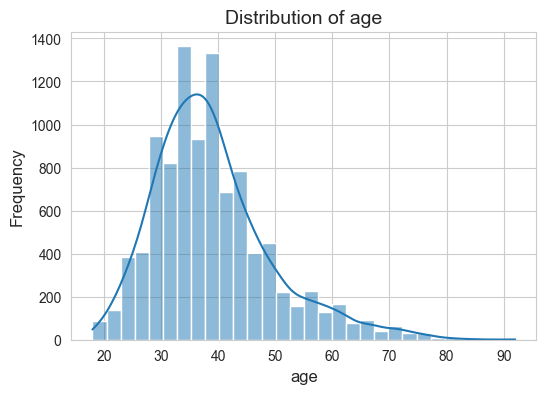

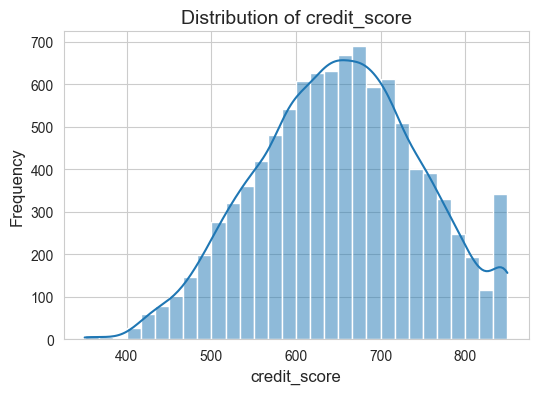

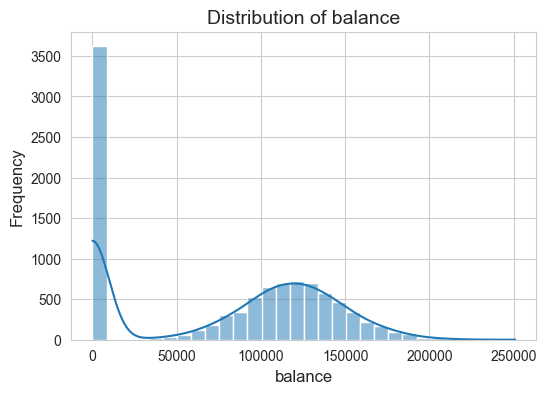

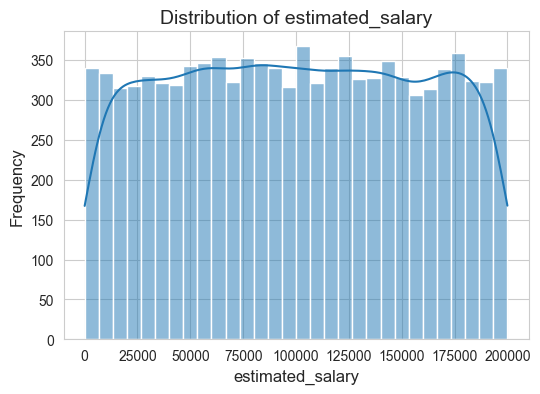

In [44]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 3.2 Churn Segmentation by Category

These visuals compare churn vs non-churn groups across categorical features:

- Country  
- Gender  
- Active Member  
- Credit Card  
- Product Count  

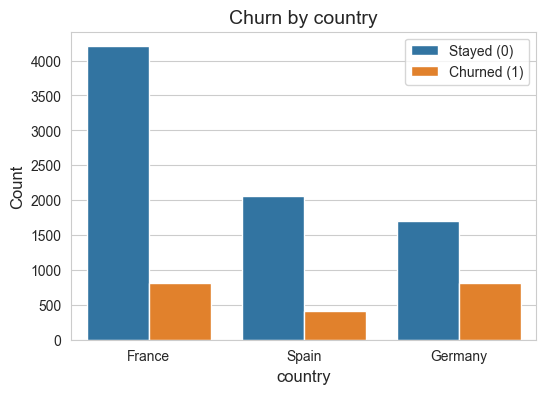

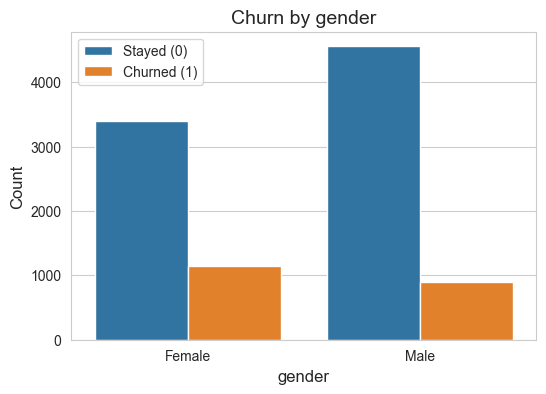

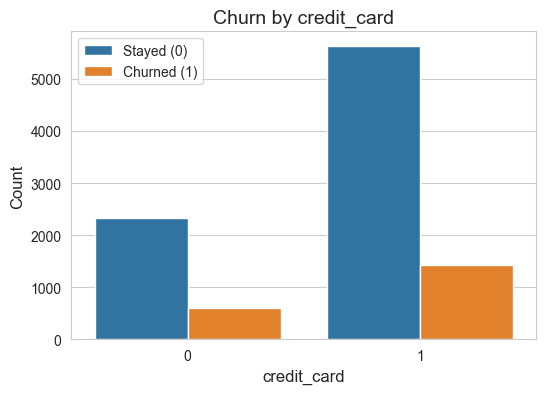

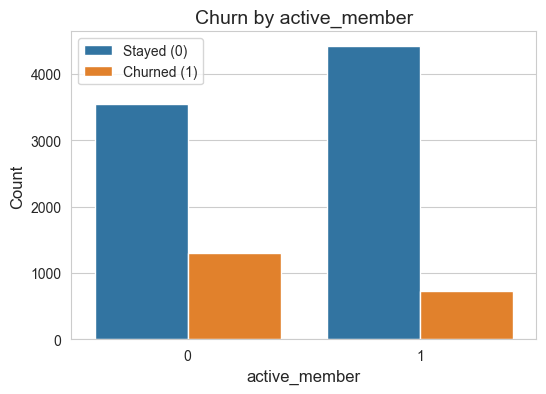

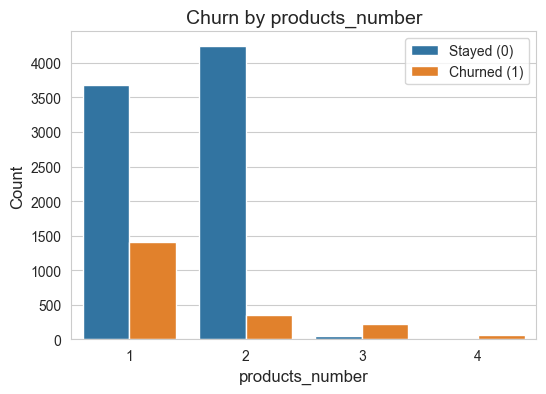

In [46]:
for col in categorical_cols:
    barplot_churn(col)

## 3.3 Country-Level Churn Analysis

Country is one of the strongest churn segmentation variables.  
Here we explore how churn differs among France, Spain, and Germany.

In [47]:
country_churn = df.groupby('country')['churn'].mean().sort_values(ascending=False)
country_churn

country
Germany    0.324432
Spain      0.166734
France     0.161548
Name: churn, dtype: float64

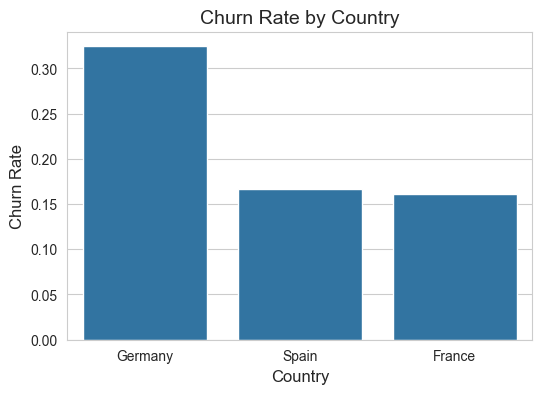

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(x=country_churn.index, y=country_churn.values)
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate")
plt.xlabel("Country")
plt.show()

## 3.4 Age vs Churn

Age is one of the strongest predictors of churn.  
We explore both distribution and density differences between churn segments.

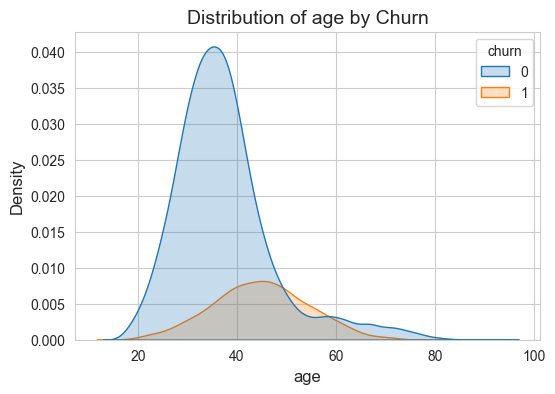

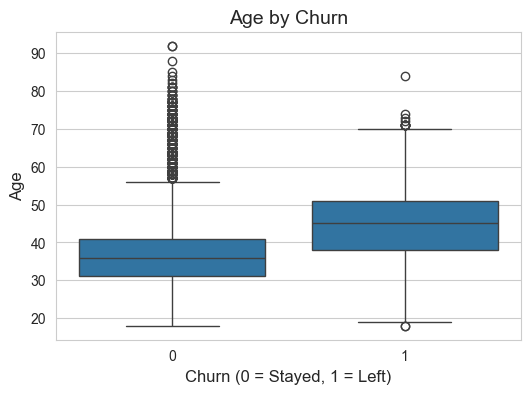

In [49]:
distplot_num('age')
boxplot_num_churn('age')

## 3.5 Balance vs Churn

Balance strongly differentiates churners from non-churners.  
High-balance customers often show higher churn — this is a key insight for retention strategy.

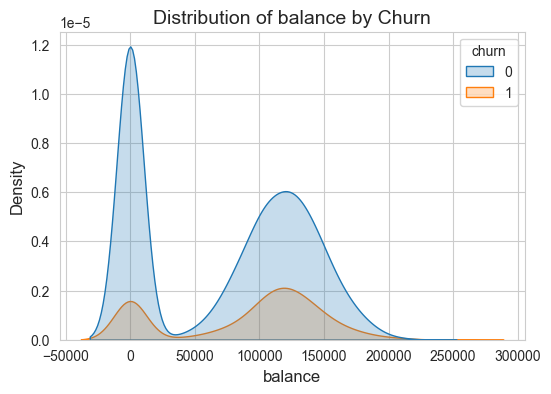

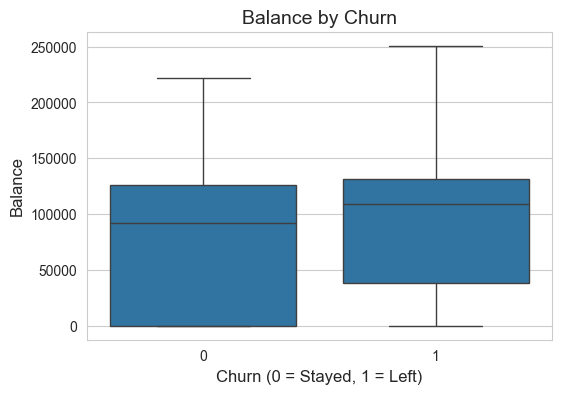

In [51]:
distplot_num('balance')
boxplot_num_churn('balance')

## 3.6 Credit Score & Salary vs Churn

We inspect whether financial stability indicators affect churn:

- Lower credit scores = slightly higher churn  
- Salary shows no significant impact  

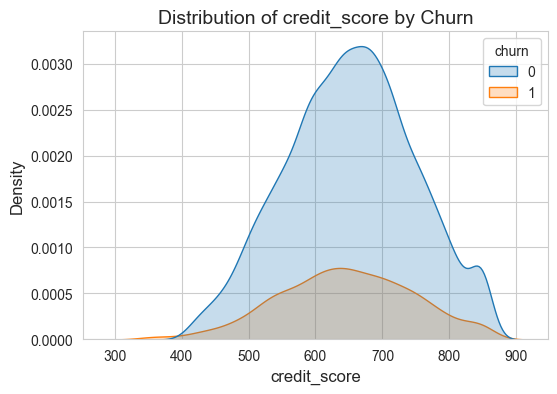

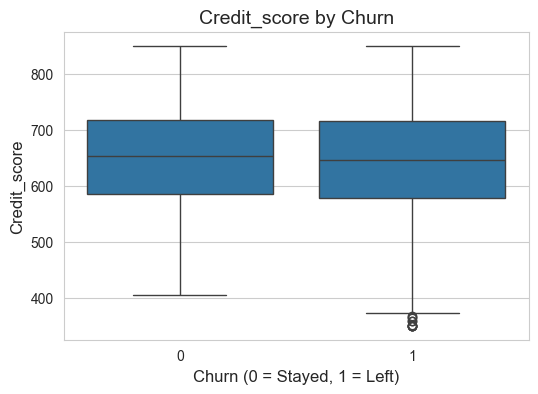

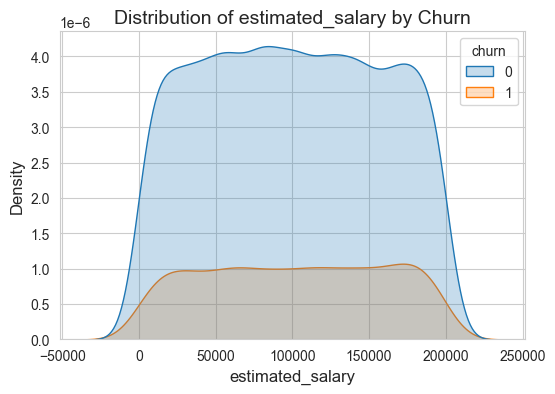

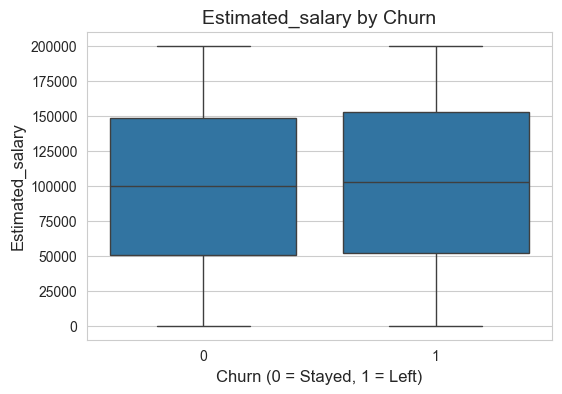

In [52]:
distplot_num('credit_score')
boxplot_num_churn('credit_score')

distplot_num('estimated_salary')
boxplot_num_churn('estimated_salary')

## 3.7 Churn by Number of Products

Product usage reveals strong trends:
- Customers with 1 product rarely churn  
- Customers with 2+ products churn significantly more  
- Customers with 4 products (rare segment) churn at extreme rates

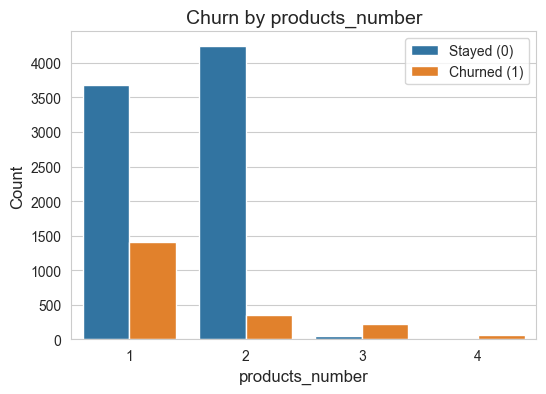

In [53]:
barplot_churn('products_number')

## ✔ Summary of Key EDA Insights

### 🔥 Top Churn Drivers
- **Age** — older customers churn more  
- **Balance** — high-balance customers churn heavily  
- **Products Number** — higher product usage = higher churn  
- **Country** — Germany shows significantly higher churn  
- **Active Member** — inactive users churn more  

### 🧊 Weak or No Impact
- Salary  
- Credit Score  
- Tenure  
- Credit Card Indicator  

These findings help shape the retention strategy and will guide future modeling.